
# Phân loại rượu vang bằng thuật toán Cây quyết định (Decision Tree)


In [2]:

import pandas as pd 
import numpy as np 
import random as rnd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn import tree 
from sklearn import datasets



## Bộ dữ liệu Rượu vang (Wine Dataset)

Bộ dữ liệu rượu vang được thu thập từ các kết quả phân tích hóa học của các loại rượu trồng tại cùng một vùng ở Ý,  
nhưng được sản xuất từ **ba giống nho khác nhau**.

Bộ dữ liệu này gồm **13 đặc trưng** hóa học được dùng để phân loại ba loại rượu khác nhau:

1. Alcohol  
2. Malic acid  
3. Ash  
4. Alcalinity of ash  
5. Magnesium  
6. Total phenols  
7. Flavanoids  
8. Nonflavanoid phenols  
9. Proanthocyanins  
10. Color intensity  
11. Hue  
12. OD280/OD315 of diluted wines  
13. Proline  

Nguồn dữ liệu: [UCI Machine Learning Repository - Wine Dataset](https://archive.ics.uci.edu/ml/datasets/wine)


In [3]:

# Tải bộ dữ liệu Wine
dataset = datasets.load_wine() 
X = dataset.data
y = dataset.target

# Chia dữ liệu thành tập huấn luyện và kiểm tra (75% - 25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [4]:

# Hiển thị bộ dữ liệu dưới dạng DataFrame
data_df = pd.DataFrame(X, columns=dataset.feature_names) 
data_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



## Xây dựng mô hình

Trong ví dụ này, chúng ta sử dụng mô hình **Decision Tree** để phân loại ba loại rượu vang.  
Cụ thể, ta giới hạn **độ sâu tối đa của cây (max_depth)** là **4** để tránh quá khớp.


In [5]:

# Khởi tạo mô hình Decision Tree với độ sâu tối đa là 4
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)


## Dự đoán và đánh giá mô hình


In [7]:

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Báo cáo đánh giá mô hình
print("Báo cáo phân loại cho Decision Tree:")
print(metrics.classification_report(y_test, y_pred))


Báo cáo phân loại cho Decision Tree:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.91      0.95        22
           2       1.00      1.00      1.00         9

    accuracy                           0.96        45
   macro avg       0.96      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



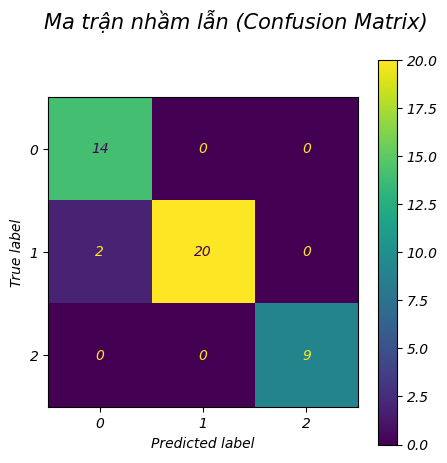

In [9]:

# Vẽ ma trận nhầm lẫn (Confusion Matrix)
plt.figure(figsize=(5, 5)) 
ax = plt.gca() 
try:
    # scikit-learn < 1.0
    disp = metrics.plot_confusion_matrix(model, X_test, y_test, ax=ax) 
    disp.figure_.suptitle("Ma trận nhầm lẫn (Confusion Matrix)", fontsize=15)
except AttributeError:
    # scikit-learn >= 1.0: use ConfusionMatrixDisplay.from_estimator
    from sklearn.metrics import ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
    disp.figure_.suptitle("Ma trận nhầm lẫn (Confusion Matrix)", fontsize=15)
plt.show()



## Trực quan hóa cấu trúc cây quyết định


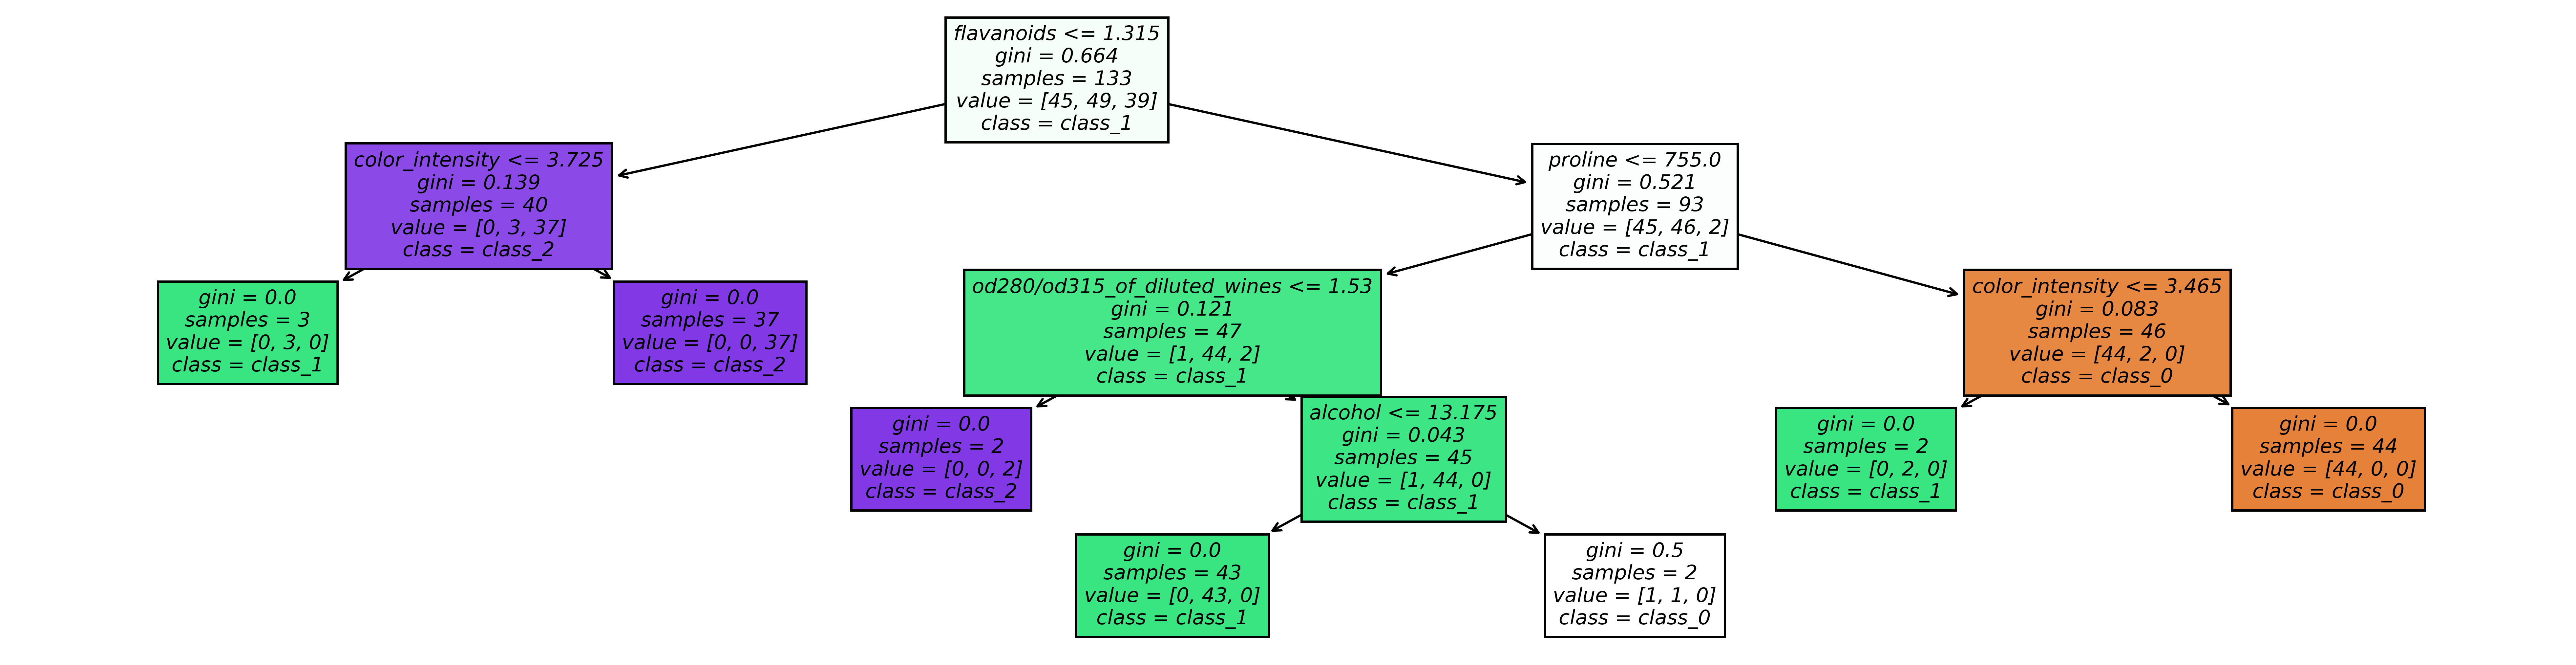

In [10]:

# Vẽ cây quyết định
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5), dpi=500) 
tree.plot_tree(
    model, 
    feature_names=dataset.feature_names,  
    class_names=dataset.target_names, 
    filled=True
)
plt.show()



## Ranh giới quyết định (Decision Boundary)

Ta có thể trực quan hóa cách mô hình Decision Tree chia ranh giới giữa các lớp dựa trên từng cặp đặc trưng.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11884\92920463.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=dataset.target_names[i],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11884\92920463.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=dataset.target_names[i],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11884\92920463.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=dataset.target_names[i],
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11884\92920463.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=dataset.target_names[i],
C:\Users\ASUS\AppData\Local\Temp\ipy

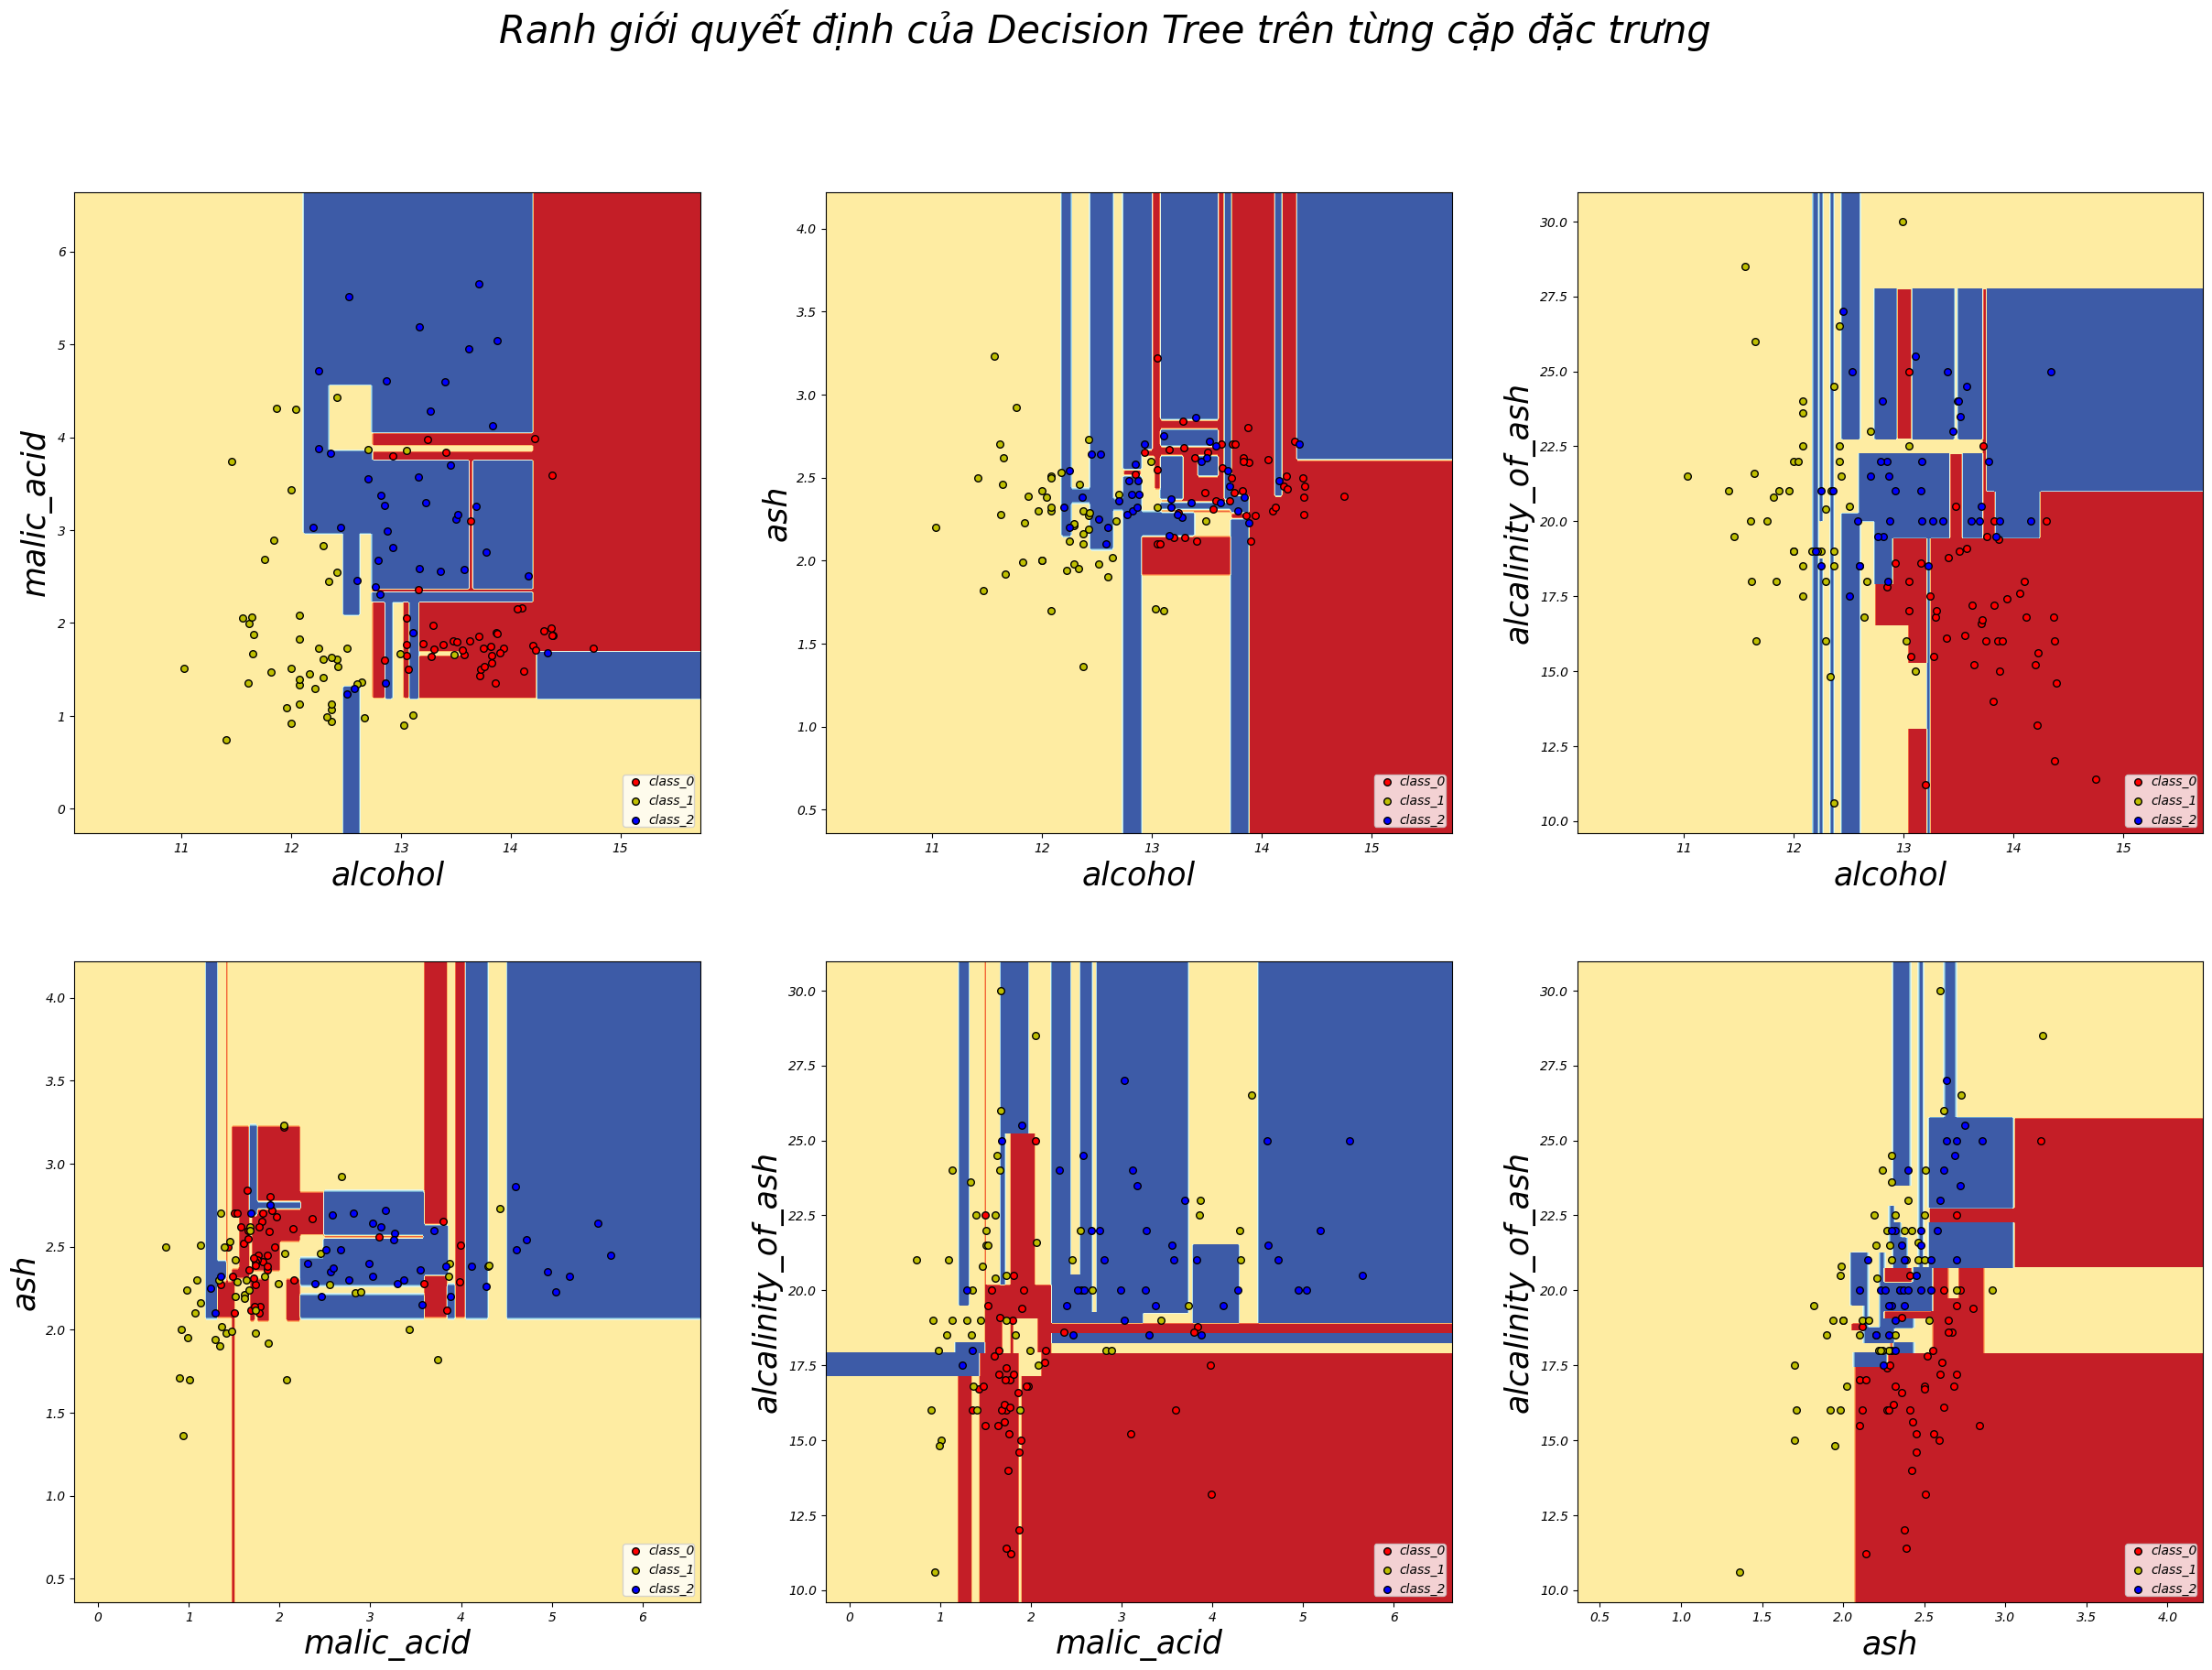

In [11]:

# Vẽ ranh giới quyết định theo từng cặp đặc trưng
n_classes = 3 
plot_colors = "ryb" 
plot_step = 0.02 
font = {'size': 25} 

plt.figure(figsize=(30, 20)) 
plt.suptitle("Ranh giới quyết định của Decision Tree trên từng cặp đặc trưng", fontsize=30)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]): 
    plt.subplot(2, 3, pairidx + 1) 
    X_pair = X_train[:, pair] 
    clf = DecisionTreeClassifier().fit(X_pair, y_train) 
    
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1 
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)) 
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) 
    plt.xlabel(dataset.feature_names[pair[0]], **font) 
    plt.ylabel(dataset.feature_names[pair[1]], **font) 
    
    # Hiển thị điểm huấn luyện
    for i, color in zip(range(n_classes), plot_colors): 
        idx = np.where(y_train == i) 
        plt.scatter(X_pair[idx, 0], X_pair[idx, 1], c=color, label=dataset.target_names[i], 
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=30)     
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)

plt.show()



## Kết luận

Trong bài thực hành này, ta sử dụng mô hình **Cây quyết định (Decision Tree)** để phân loại ba loại rượu vang.  
Mô hình đạt **độ chính xác khoảng 96%** trên tập kiểm tra, chứng tỏ khả năng phân loại khá tốt.  
Tuy nhiên, cần điều chỉnh các siêu tham số như `max_depth`, `criterion`, hoặc sử dụng **Random Forest** để cải thiện khả năng tổng quát hóa.
